<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_cur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [197]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [198]:
import warnings

warnings.filterwarnings('ignore')

input

In [199]:
df = pd.read_csv("pp_cur.csv")

exploratory

In [200]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        1238 non-null   int64
 1   Problem Solving  1238 non-null   int64
 2   Interaction      1238 non-null   int64
 3   Impact           1238 non-null   int64
 4   Accountability   1238 non-null   int64
dtypes: int64(5)
memory usage: 48.5 KB


In [201]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,40,15,20,30,0
1,40,15,20,30,0
2,40,15,20,30,0
3,40,20,20,30,0
4,40,20,20,30,0


checks

In [202]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,124.634087,43.340872,44.490307,108.412763,24.983037
std,50.693965,21.083085,18.631503,44.318518,19.355472
min,40.000000,15.000000,20.000000,30.000000,0.000000
25%,89.000000,27.000000,27.000000,64.000000,0.000000
50%,118.000000,36.000000,36.000000,116.000000,25.000000
75%,150.000000,48.000000,49.000000,128.000000,40.000000
max,300.000000,117.000000,129.000000,230.000000,75.000000


In [203]:
X=df

Scaling

In [204]:
cols = X.columns

In [205]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [206]:
X = pd.DataFrame(X, columns=[cols])

In [207]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.04902,0.0,0.0,0.0
4,0.0,0.04902,0.0,0.0,0.0


In [208]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.000000,0.000000,0.000000,0.000,0.000000
1,0.000000,0.000000,0.000000,0.000,0.000000
2,0.000000,0.000000,0.000000,0.000,0.000000
3,0.000000,0.049020,0.000000,0.000,0.000000
4,0.000000,0.049020,0.000000,0.000,0.000000
...,...,...,...,...,...
1233,0.865385,0.705882,0.422018,0.760,0.706667
1234,0.688462,1.000000,0.642202,0.915,0.560000
1235,0.865385,0.705882,0.422018,1.000,0.800000
1236,0.688462,1.000000,0.642202,0.915,0.733333


K means

In [209]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [210]:
kmeans.cluster_centers_

array([[0.2055123 , 0.15617475, 0.13120133, 0.25355601, 0.20674764],
       [0.5044343 , 0.4592654 , 0.3640559 , 0.59857143, 0.52150235]])

inertia

In [211]:
kmeans.inertia_

144.22426964001892

Elbow

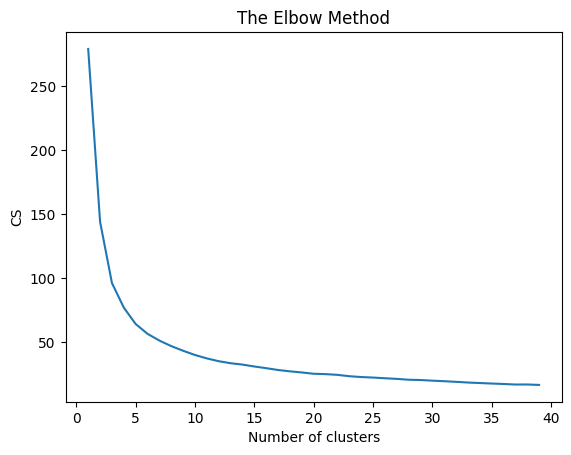

In [212]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

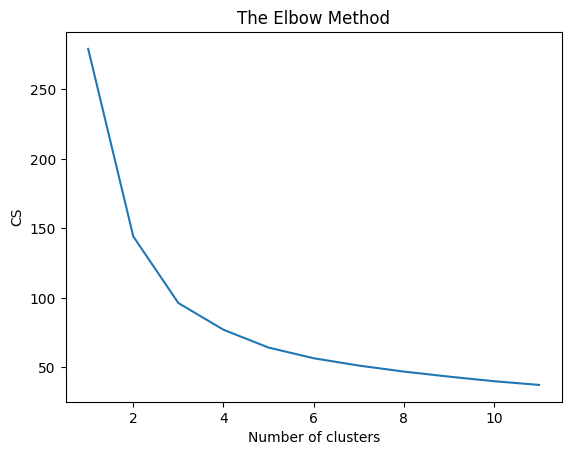

In [213]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [214]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [215]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_cur_l.csv')
print(labels)

[3 3 3 ... 2 2 2]


In [216]:
Z=kmeans.cluster_centers_
Z

array([[4.07474817e-01, 3.50169234e-01, 2.96444954e-01, 5.12559524e-01,
        4.84047619e-01],
       [2.29704953e-01, 1.63900081e-01, 1.25574965e-01, 3.05328767e-01,
        4.31452055e-01],
       [6.81808134e-01, 6.74836601e-01, 4.99261837e-01, 7.54252874e-01,
        5.30268199e-01],
       [1.75206612e-01, 1.35202290e-01, 1.26292112e-01, 1.94132231e-01,
        8.88178420e-16]])

In [217]:
import matplotlib

In [218]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=400)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1238 samples in 0.002s...
[t-SNE] Computed neighbors for 1238 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1238
[t-SNE] Computed conditional probabilities for sample 1238 / 1238
[t-SNE] Mean sigma: 0.105758
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.954826
[t-SNE] KL divergence after 2500 iterations: 0.294564


In [219]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

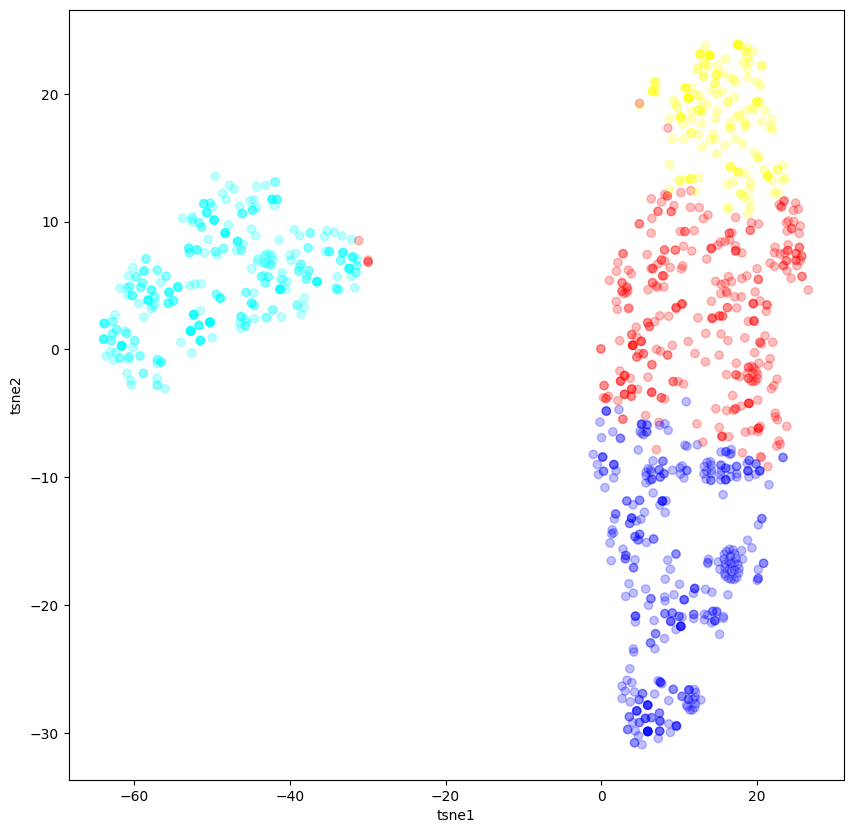

In [220]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [221]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_cur.csv')
Z2

array([[1.45943452e+02, 5.07172619e+01, 5.23125000e+01, 1.32511905e+02,
        3.63035714e+01],
       [9.97232877e+01, 3.17178082e+01, 3.36876712e+01, 9.10657534e+01,
        3.23589041e+01],
       [2.17270115e+02, 8.38333333e+01, 7.44195402e+01, 1.80850575e+02,
        3.97701149e+01],
       [8.55537190e+01, 2.87906336e+01, 3.37658402e+01, 6.88264463e+01,
        6.66133815e-14]])